<a href="https://colab.research.google.com/github/Louis5228/Digital-Image-Process/blob/main/Color_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Digital Image Process/HW4")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


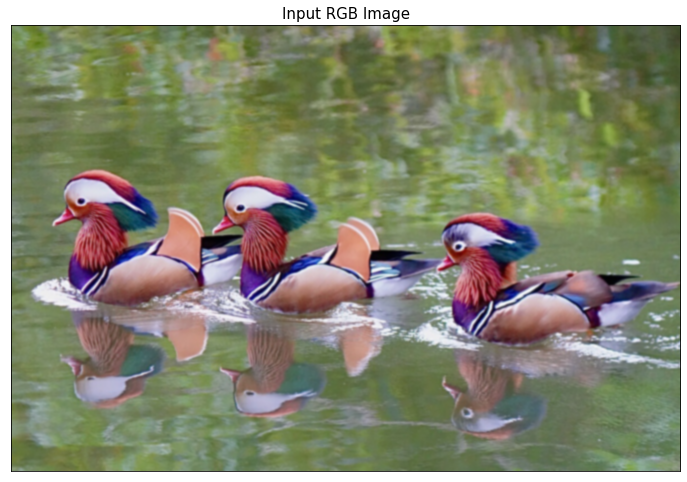

In [54]:
# load image
img = cv2.imread('Bird 3 blurred.tif')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.title('Input RGB Image', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(show_img)
plt.show()

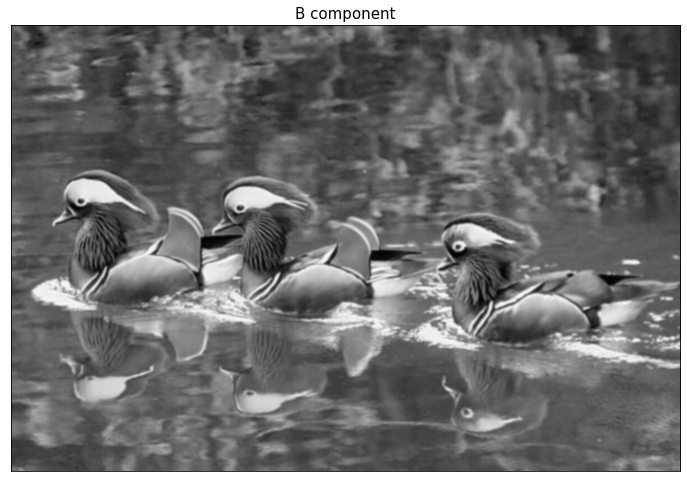

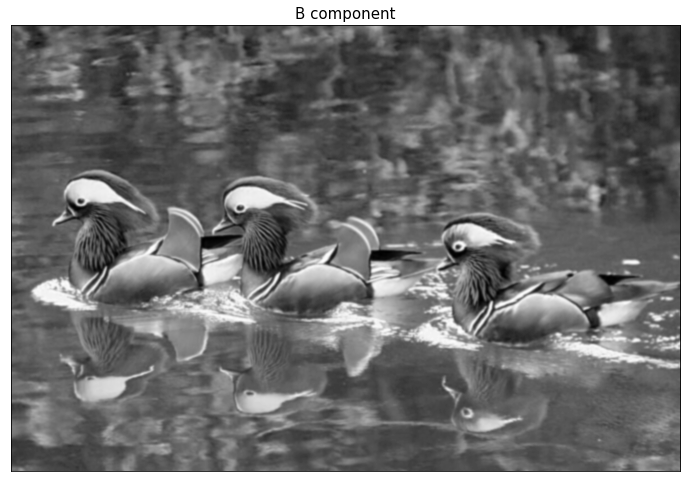

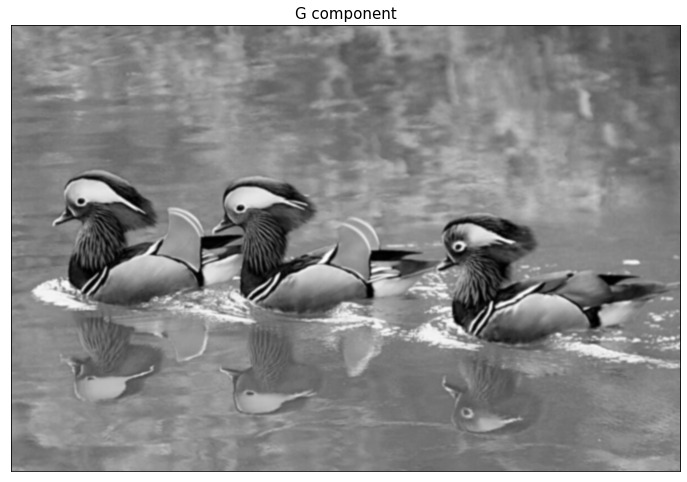

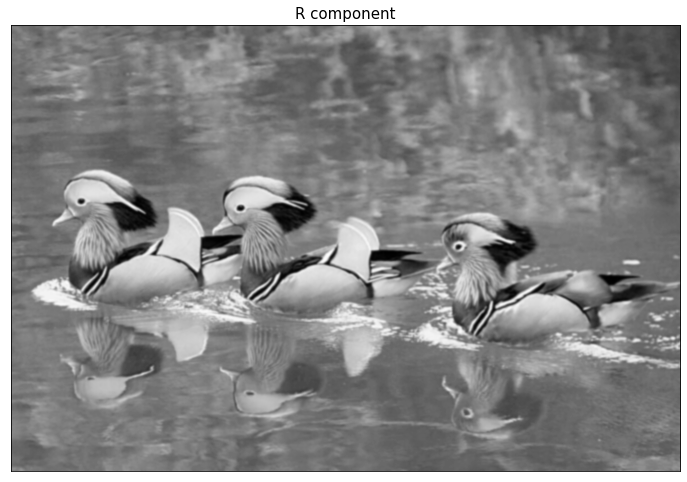

In [135]:
# RGB component
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

# plt.figure(figsize=(12,12))
# plt.title('B component', fontsize = 15), plt.xticks([]), plt.yticks([])
# show_b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
# plt.imshow(show_b)
# plt.show()

plt.figure(figsize=(12,12))
plt.title('B component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(b, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('G component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(g, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('R component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(r, cmap = 'gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in double_scalars


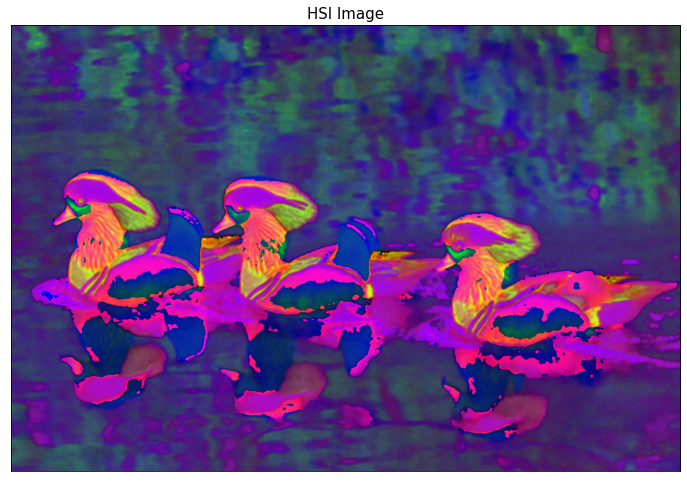

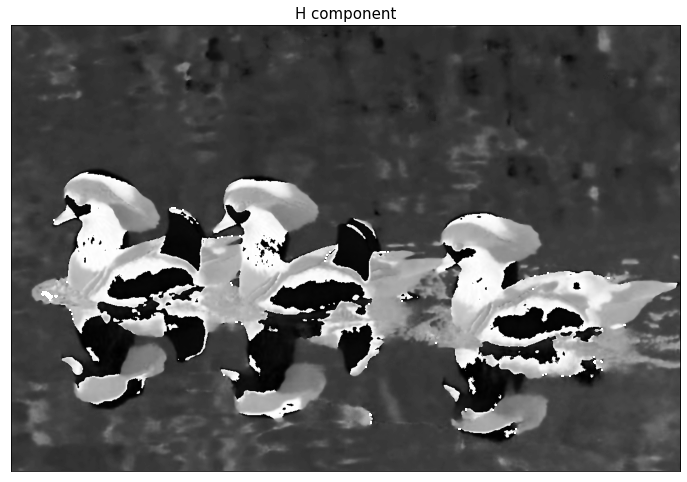

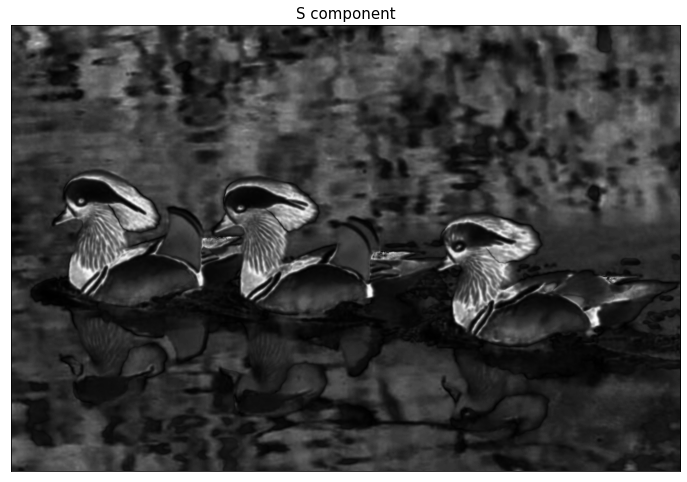

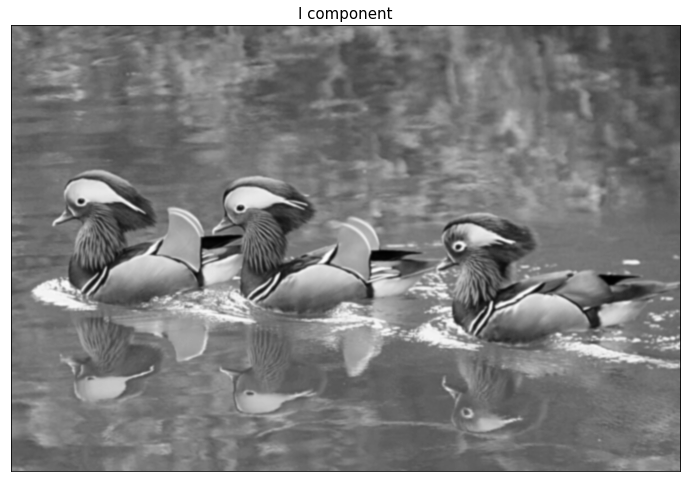

In [134]:
# HSI Component
b_ = b / 255.0
g_ = g / 255.0
r_ = r / 255.0

# hsi_img = np.copy(img)

# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):

#     ## Calculate Hue
#     num = 0.5 * ((r_[i][j] - g_[i][j]) + (r_[i][j] - b_[i][j]))
#     den = math.sqrt((r_[i][j] - g_[i][j])**2 + ((r_[i][j] - b_[i][j]) * (g_[i][j] - b_[i][j])))
#     theta = math.acos(num / den)
#     if den == 0:
#       H = 0
#     if b_[i][j] <= g_[i][j]:
#       H = theta
#     else:
#       H = 2*math.pi - theta
#     H = H / (2*math.pi)

#     ## Calculate Saturation
#     rgb_minimum = min(b_[i][j], g_[i][j], r_[i][j])
#     sum = b_[i][j] + g_[i][j] + r_[i][j]
#     if sum == 0:
#       S = 0
#     else:
#       S = 1 - (3.0 / (r_[i][j] + g_[i][j] + b_[i][j]) * rgb_minimum)

#     ## Calculate Intensity
#     I = sum / 3.0
#     print(H)
#     hsi_img[i, j, 0] = H*255
#     hsi_img[i, j, 1] = S*255
#     hsi_img[i, j, 2] = I*255

# h = hsi_img[:,:,0]
# s = hsi_img[:,:,1]
# i = hsi_img[:,:,2]

# plt.figure(figsize=(12,12))
# plt.title('H Component', fontsize = 15), plt.xticks([]), plt.yticks([])
# plt.imshow(h)
# plt.show()
# plt.figure(figsize=(12,12))
# plt.title('S Component', fontsize = 15), plt.xticks([]), plt.yticks([])
# plt.imshow(s)
# plt.show()
# plt.figure(figsize=(12,12))
# plt.title('I Component', fontsize = 15), plt.xticks([]), plt.yticks([])
# plt.imshow(i)
# plt.show()

# print(h.shape)

# plt.figure(figsize=(12,12))
# plt.title('HSI Image', fontsize = 15), plt.xticks([]), plt.yticks([])
# show_hsi_img = cv2.cvtColor(hsi_img, cv2.COLOR_BGR2RGB)
# plt.imshow(show_hsi_img)
# plt.show()
# plt.figure(figsize=(12,12))
# plt.title('HSI Image', fontsize = 15), plt.xticks([]), plt.yticks([])
# plt.imshow(hsi_img)
# plt.show()

#Calculate Intensity
def calc_intensity(red, blue, green):
  return np.divide(blue + green + red, 3)

#Calculate Saturation
def calc_saturation(red, blue, green):
  minimum = np.minimum(np.minimum(red, green), blue)
  saturation = 1 - (3 / (red + green + blue) * minimum)
  return saturation

#Calculate Hue
def calc_hue(red, blue, green):
  hue = np.copy(red)

  for i in range(0, blue.shape[0]):
    for j in range(0, blue.shape[1]):
      hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                  math.sqrt((red[i][j] - green[i][j])**2 +
                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
      hue[i][j] = math.acos(hue[i][j])

      if blue[i][j] <= green[i][j]:
        hue[i][j] = hue[i][j]
      else:
        hue[i][j] = 2*math.pi - hue[i][j]
  return hue

h = calc_hue(r_, b_, g_)/(2*math.pi)
s = calc_saturation(r_, b_, g_)
i = calc_intensity(r_, b_, g_)
hsi_img = cv2.merge((h, s, i))

plt.figure(figsize=(12,12))
plt.title('HSI Image', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(hsi_img)
plt.show()
plt.figure(figsize=(12,12))
plt.title('H component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(h, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('S component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(s, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('I component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(i, cmap = 'gray')
plt.show()

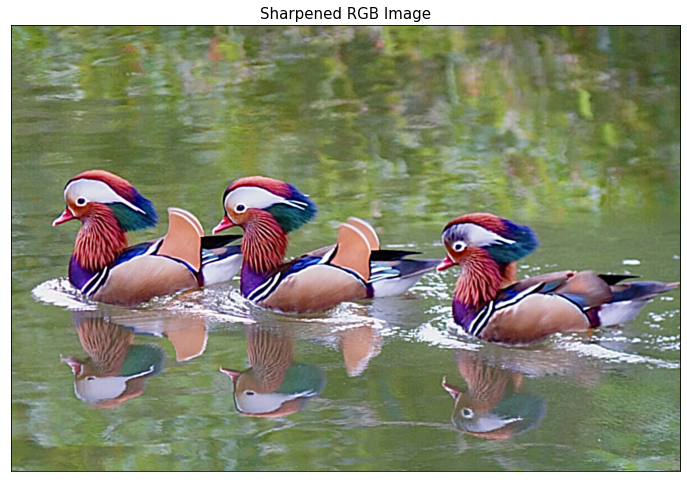

In [133]:
kernal = np.array(([-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]))
shrp_RGB = cv2.filter2D(img, -1, kernal)
# shrp_HSI = cv2.filter2D(hsi_img, -1, kernal)

plt.figure(figsize=(12,12))
plt.title('Sharpened RGB Image', fontsize = 15), plt.xticks([]), plt.yticks([])
show_shrp_RGB = cv2.cvtColor(shrp_RGB, cv2.COLOR_BGR2RGB)
plt.imshow(show_shrp_RGB)
plt.show()
# plt.figure(figsize=(12,12))
# plt.title('Sharpened HSI Image', fontsize = 15), plt.xticks([]), plt.yticks([])
# plt.imshow(shrp_HSI)
# plt.show()

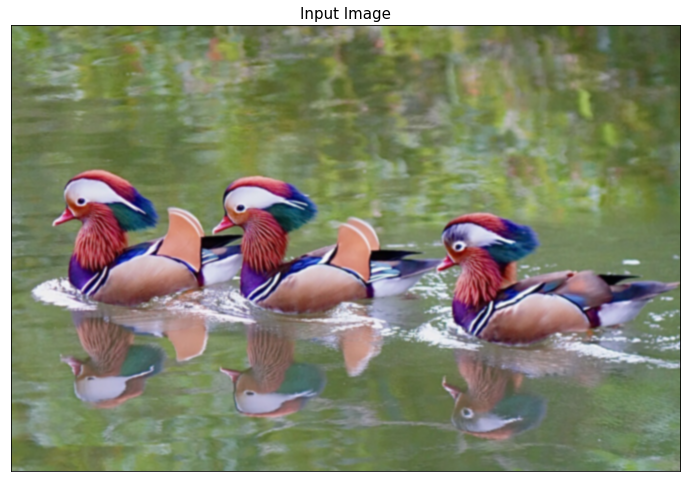

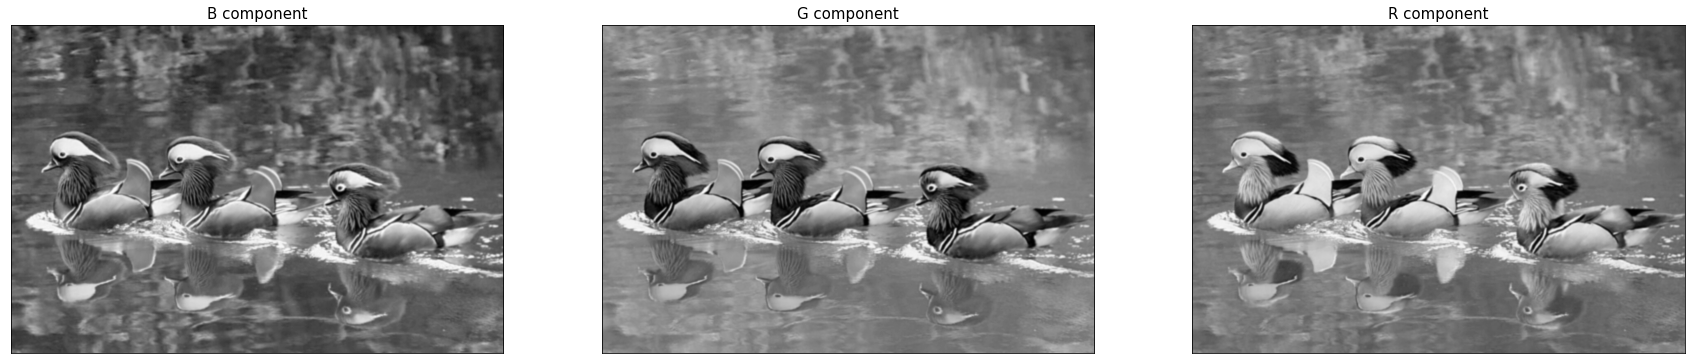

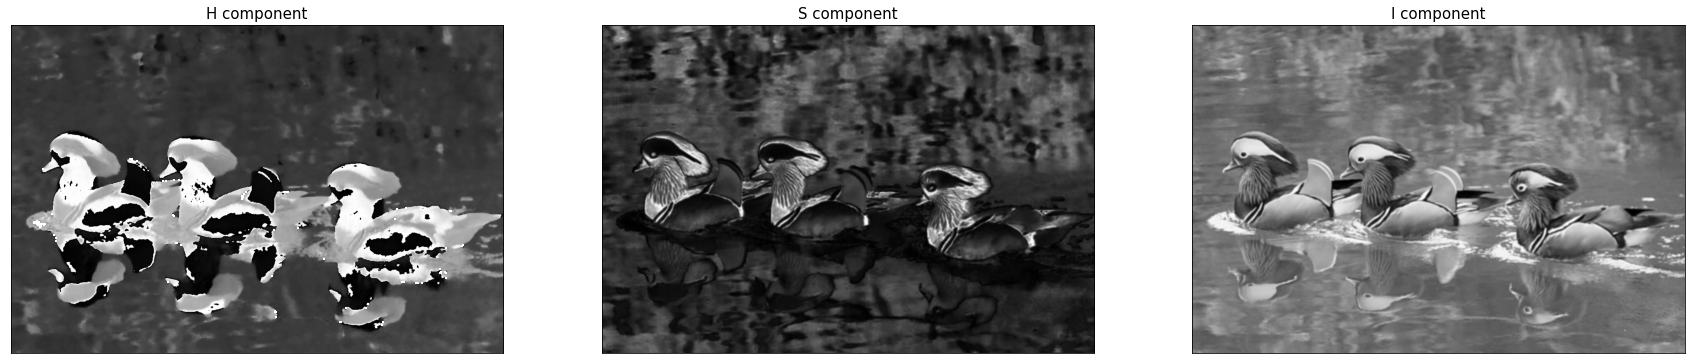

In [4]:
plt.figure(figsize=(12,12))
plt.title('H component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(h, cmap = 'gray')
plt.title('S component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(s, cmap = 'gray')
plt.title('I component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(i, cmap = 'gray')
plt.show()